# モデルの学習曲線

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_smoothing_spline

In [3]:
date_str = "2025-08-28"
state = "新規"

code = "7011"
filename = f"../output/learning_curve.csv"
print(filename)
df = pd.read_csv(filename, index_col=0)
df

../output/learning_curve.csv


,Epoch,Data,Profit
0,7,tick_20250827.xlsx,1100.0
1,14,tick_20250827.xlsx,0.0
2,21,tick_20250827.xlsx,-400.0
3,28,tick_20250827.xlsx,1100.0
4,35,tick_20250827.xlsx,-1800.0
5,42,tick_20250827.xlsx,2000.0
6,49,tick_20250827.xlsx,100.0
7,56,tick_20250827.xlsx,-3500.0
8,63,tick_20250827.xlsx,-1800.0
9,70,tick_20250827.xlsx,1500.0


In [6]:
spl = make_smoothing_spline(df["Epoch"], df["Profit"])
xs = np.linspace(0, 99, 1000)

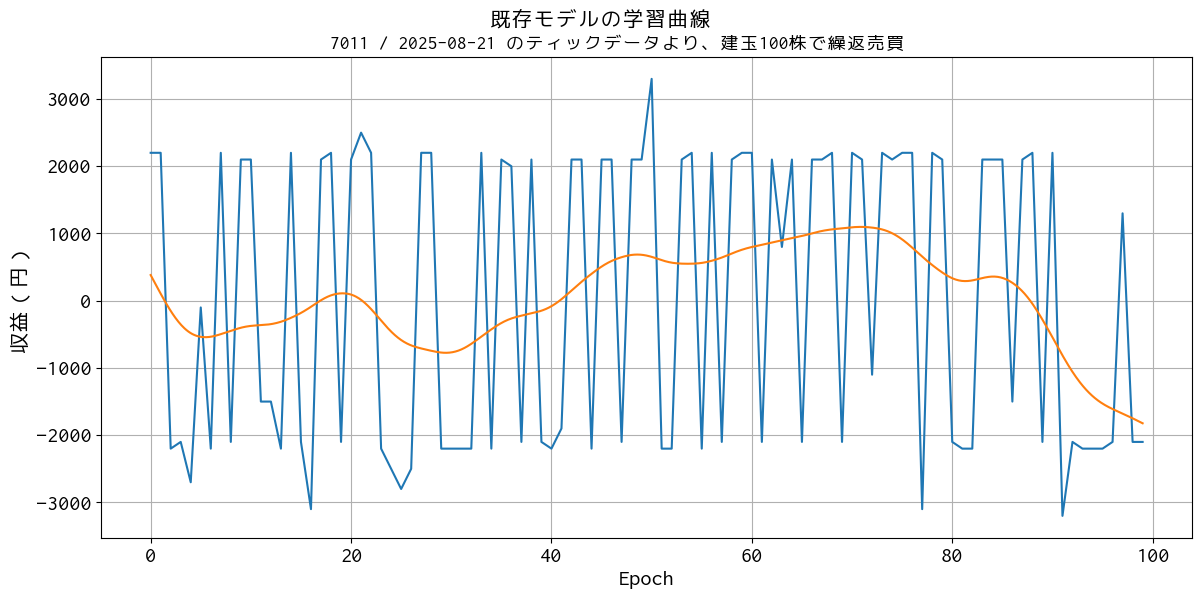

In [7]:
FONT_PATH = "fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df["Epoch"], df["Profit"])
ax.plot(xs, spl(xs))

fig.suptitle(f"{state}モデルの学習曲線", fontsize=16)
ax.set_title(f"{code} / {date_str} に使用したモデル（建玉100株で繰返売買）      ", fontsize=14)
ax.grid()
ax.set_xlabel("Epoch")
ax.set_ylabel("収益（円）")

plt.tight_layout(pad=0.4, rect=[0, 0, 1.0, 1.0])
plt.savefig(f"output/{date_str}_{code}_learning_curve.png" )
plt.show()